In [1]:
import pandas as pd, numpy as np
df = pd.read_csv("IMDB-Dataset.csv")

df

,Ratings,Reviews,Movies,Resenhas
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,* Isenção de responsabilidade: eu só assisti e...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,Estou escrevendo isso na esperança de que isso...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,"Realmente, eu poderia escrever uma crítica con..."
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,Se você viu os outros filmes falsificados ante...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,Este filme eu vi um dia cedo de graça e ainda ...
...,...,...,...,...
149995,10.0,GoldenEye (1995) is my number 1 personal favor...,GoldenEye,GoldenEye (1995) é o meu filme favorito pessoa...
149996,10.0,"*** 1/2Starring: Pierce Brosnan, Izabella Scor...",GoldenEye,"Estrelando: Pierce Brosnan, Izabella Scorupco,..."
149997,10.0,"I've given this film a 10, not just because I ...",GoldenEye,"Eu dei 10 a este filme, não apenas porque eu g..."
149998,10.0,I absolutely adore this movie. What a comeback...,GoldenEye,Eu absolutamente adoro este filme. Que retorno...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Ratings   150000 non-null  float64
 1   Reviews   150000 non-null  object 
 2   Movies    149975 non-null  object 
 3   Resenhas  150000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


In [3]:
df.describe()

,Ratings
count,150000.000000
mean,5.500000
std,2.872291
min,1.000000
25%,3.000000
50%,5.500000
75%,8.000000
max,10.000000


In [4]:
df_new = df.drop(['Resenhas', 'Movies'], axis=1)
df_new

,Ratings,Reviews
0,1.0,*Disclaimer: I only watched this movie as a co...
1,1.0,I am writing this in hopes that this gets put ...
2,1.0,"Really, I could write a scathing review of thi..."
3,1.0,If you saw the other previous spoof movies by ...
4,1.0,This movie I saw a day early for free and I st...
...,...,...
149995,10.0,GoldenEye (1995) is my number 1 personal favor...
149996,10.0,"*** 1/2Starring: Pierce Brosnan, Izabella Scor..."
149997,10.0,"I've given this film a 10, not just because I ..."
149998,10.0,I absolutely adore this movie. What a comeback...


In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Ratings  150000 non-null  float64
 1   Reviews  150000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [6]:
df_new.isnull().sum()

Ratings    0
Reviews    0
dtype: int64

In [7]:
df_new.duplicated().sum()

np.int64(207)

In [8]:
df_dup = df_new[df_new.duplicated(keep='first')]
df_dup

,Ratings,Reviews
1394,1.0,"Wow...OK. So, after reading the little feud on..."
1978,1.0,I am 100 percent confirm it is the worst film ...
3282,1.0,"This movie was a joke. Seriously, why would an..."
4404,1.0,What a waste of time and money. There is no st...
7053,1.0,"First of all, watching the movie does not give..."
...,...,...
138708,10.0,Love is something very special for everyone wh...
138709,10.0,Love is something very special for everyone wh...
140984,10.0,Dhadak is not the unconventional love story th...
141454,10.0,Amazing chemistry between Kartik and Sara. A c...


In [9]:
df_new = df_new.drop_duplicates()
df_new

,Ratings,Reviews
0,1.0,*Disclaimer: I only watched this movie as a co...
1,1.0,I am writing this in hopes that this gets put ...
2,1.0,"Really, I could write a scathing review of thi..."
3,1.0,If you saw the other previous spoof movies by ...
4,1.0,This movie I saw a day early for free and I st...
...,...,...
149995,10.0,GoldenEye (1995) is my number 1 personal favor...
149996,10.0,"*** 1/2Starring: Pierce Brosnan, Izabella Scor..."
149997,10.0,"I've given this film a 10, not just because I ..."
149998,10.0,I absolutely adore this movie. What a comeback...


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149793 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Ratings  149793 non-null  float64
 1   Reviews  149793 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.4+ MB


In [11]:
# Create a function to map ratings to sentiment categories
def map_rating_to_sentiment(rating):
    if 9.0 <= rating <= 10.0:
        return 'very positive'
    elif 7.0 <= rating <= 8.0:
        return 'positive'
    elif 5.0 <= rating <= 6.0:
        return 'neutral'
    elif 3.0 <= rating <= 4.0:
        return 'negative'
    else:
        return 'very negative'

# Apply the mapping to the Ratings column
df_new['Ratings'] = df_new['Ratings'].apply(map_rating_to_sentiment)
df_new

C:\Users\Vin Sen\AppData\Local\Temp\ipykernel_9512\2036936987.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Ratings'] = df_new['Ratings'].apply(map_rating_to_sentiment)


,Ratings,Reviews
0,very negative,*Disclaimer: I only watched this movie as a co...
1,very negative,I am writing this in hopes that this gets put ...
2,very negative,"Really, I could write a scathing review of thi..."
3,very negative,If you saw the other previous spoof movies by ...
4,very negative,This movie I saw a day early for free and I st...
...,...,...
149995,very positive,GoldenEye (1995) is my number 1 personal favor...
149996,very positive,"*** 1/2Starring: Pierce Brosnan, Izabella Scor..."
149997,very positive,"I've given this film a 10, not just because I ..."
149998,very positive,I absolutely adore this movie. What a comeback...


In [12]:
df_new.rename(columns={'Reviews': 'text', 'Ratings': 'label'}, inplace=True)
df_new

C:\Users\Vin Sen\AppData\Local\Temp\ipykernel_9512\852093043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={'Reviews': 'text', 'Ratings': 'label'}, inplace=True)


,label,text
0,very negative,*Disclaimer: I only watched this movie as a co...
1,very negative,I am writing this in hopes that this gets put ...
2,very negative,"Really, I could write a scathing review of thi..."
3,very negative,If you saw the other previous spoof movies by ...
4,very negative,This movie I saw a day early for free and I st...
...,...,...
149995,very positive,GoldenEye (1995) is my number 1 personal favor...
149996,very positive,"*** 1/2Starring: Pierce Brosnan, Izabella Scor..."
149997,very positive,"I've given this film a 10, not just because I ..."
149998,very positive,I absolutely adore this movie. What a comeback...


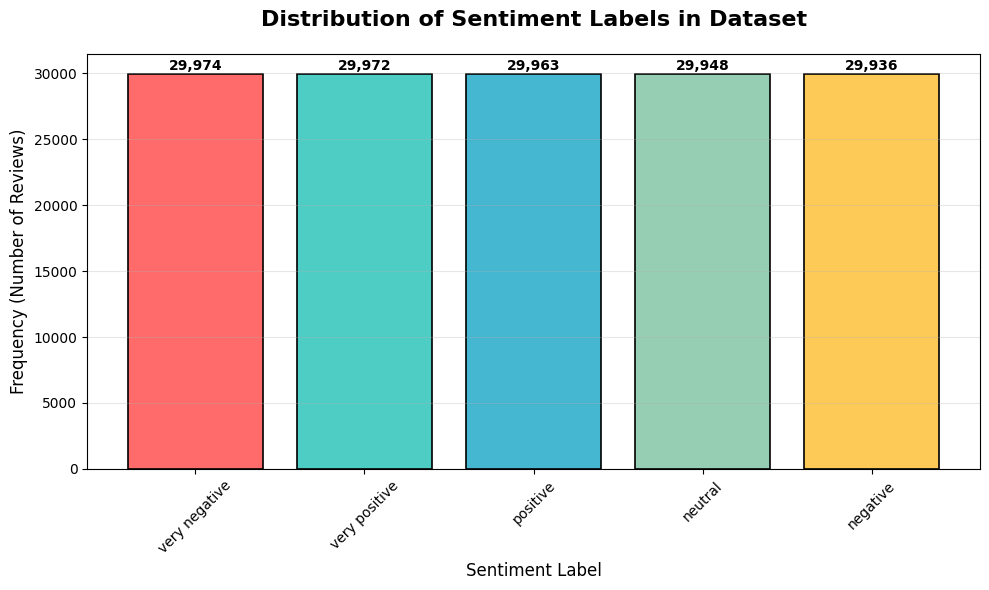

Total samples: 149,793
Label distribution:
  very negative: 29,974 (20.0%)
  very positive: 29,972 (20.0%)
  positive: 29,963 (20.0%)
  neutral: 29,948 (20.0%)
  negative: 29,936 (20.0%)


In [13]:
import matplotlib.pyplot as plt

# Simple label distribution plot
plt.figure(figsize=(10, 6))
label_counts = df_new['label'].value_counts()

# Create bar plot
bars = plt.bar(label_counts.index, label_counts.values, 
               color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57'], 
               edgecolor='black', linewidth=1.2)

# Customize the plot
plt.title('Distribution of Sentiment Labels in Dataset', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Frequency (Number of Reviews)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for bar, value in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary
print(f"Total samples: {len(df_new):,}")
print(f"Label distribution:")
for label, count in label_counts.items():
    print(f"  {label}: {count:,} ({count/len(df_new)*100:.1f}%)")

In [14]:
df_new.nunique()

label         5
text     149780
dtype: int64

In [16]:
import re, emoji, html
from bs4 import BeautifulSoup

def clean(text):
    text = BeautifulSoup(text, "html.parser").get_text(" ")  # strip HTML tags
    text = html.unescape(text)                               # e.g. &amp; → &
    text = emoji.demojize(text, delimiters=(" ", " "))       # 😀 →  smile_face 
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r"@\w+", "", text)                          # remove mentions
    text = re.sub(r"#\w+", "", text)                          # remove hashtags
    text = re.sub(r"[^\w\s.,!?;:]", "", text)       # remove special characters
    text = text.lower()                                       # convert to lowercase    
    text = re.sub(r"\s+", " ", text).strip()                 # collapse spaces
    return text

In [17]:
df_new['text_clean'] = df_new['text'].apply(clean)
df_new

C:\Users\Vin Sen\AppData\Local\Temp\ipykernel_9512\4164018792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text_clean'] = df_new['text'].apply(clean)


,label,text,text_clean
0,very negative,*Disclaimer: I only watched this movie as a co...,disclaimer: i only watched this movie as a con...
1,very negative,I am writing this in hopes that this gets put ...,i am writing this in hopes that this gets put ...
2,very negative,"Really, I could write a scathing review of thi...","really, i could write a scathing review of thi..."
3,very negative,If you saw the other previous spoof movies by ...,if you saw the other previous spoof movies by ...
4,very negative,This movie I saw a day early for free and I st...,this movie i saw a day early for free and i st...
...,...,...,...
149995,very positive,GoldenEye (1995) is my number 1 personal favor...,goldeneye 1995 is my number 1 personal favorit...
149996,very positive,"*** 1/2Starring: Pierce Brosnan, Izabella Scor...","12starring: pierce brosnan, izabella scorupco,..."
149997,very positive,"I've given this film a 10, not just because I ...","ive given this film a 10, not just because i t..."
149998,very positive,I absolutely adore this movie. What a comeback...,i absolutely adore this movie. what a comeback...


In [18]:
df_new = df_new.drop(['text'], axis=1)  # Drop original text column
df_new.rename(columns={'text_clean': 'text'}, inplace=True)  # Rename cleaned text column

In [19]:
df_new

,label,text
0,very negative,disclaimer: i only watched this movie as a con...
1,very negative,i am writing this in hopes that this gets put ...
2,very negative,"really, i could write a scathing review of thi..."
3,very negative,if you saw the other previous spoof movies by ...
4,very negative,this movie i saw a day early for free and i st...
...,...,...
149995,very positive,goldeneye 1995 is my number 1 personal favorit...
149996,very positive,"12starring: pierce brosnan, izabella scorupco,..."
149997,very positive,"ive given this film a 10, not just because i t..."
149998,very positive,i absolutely adore this movie. what a comeback...


In [20]:
import re, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop   = set(stopwords.words("english"))
lemma  = WordNetLemmatizer()
regex  = re.compile(r"[^a-zA-Z']")

def clean_text(text: str) -> str:
    text = regex.sub(" ", text)           # drop punctuation / digits
    tokens = (lemma.lemmatize(tok) for tok in text.lower().split())
    return " ".join(tok for tok in tokens if tok not in stop and len(tok) > 2)

In [21]:
df_new['new_text'] = [clean_text(x) for x in df_new['text']]
df_new

,label,text,new_text
0,very negative,disclaimer: i only watched this movie as a con...,disclaimer watched movie conditional agreement...
1,very negative,i am writing this in hopes that this gets put ...,writing hope get put previous review film anyo...
2,very negative,"really, i could write a scathing review of thi...",really could write scathing review turd sandwi...
3,very negative,if you saw the other previous spoof movies by ...,saw previous spoof movie two horrible gentlema...
4,very negative,this movie i saw a day early for free and i st...,movie saw day early free still feel like got r...
...,...,...,...
149995,very positive,goldeneye 1995 is my number 1 personal favorit...,goldeneye number personal favorite movie time ...
149996,very positive,"12starring: pierce brosnan, izabella scorupco,...",starring pierce brosnan izabella scorupco sean...
149997,very positive,"ive given this film a 10, not just because i t...",ive given film thoroughly enjoyed believe best...
149998,very positive,i absolutely adore this movie. what a comeback...,absolutely adore movie comeback bond timothy d...


In [ ]:
df_new = df_new.drop(['text'], axis=1)  # Drop original text column
df_new.rename(columns={'new_text': 'text'}, inplace=True)  # Rename cleaned text column
df_new

,label,text
0,very negative,disclaimer watched movie conditional agreement...
1,very negative,writing hope get put previous review film anyo...
2,very negative,really could write scathing review turd sandwi...
3,very negative,saw previous spoof movie two horrible gentlema...
4,very negative,movie saw day early free still feel like got r...
...,...,...
149995,very positive,goldeneye number personal favorite movie time ...
149996,very positive,starring pierce brosnan izabella scorupco sean...
149997,very positive,ive given film thoroughly enjoyed believe best...
149998,very positive,absolutely adore movie comeback bond timothy d...


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(df_new['text'], df_new['label'],test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [26]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((104855,), (22469,), (22469,), (104855,), (22469,), (22469,))

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1,2),      # unigrams + bigrams
    min_df=5,               # ignore very rare terms
    max_df=0.8,             # ignore overly common terms
    sublinear_tf=True       # log-scale term freq
).fit(X_train)

X_tr = tfidf.transform(X_train)
X_va = tfidf.transform(X_val)
X_te = tfidf.transform(X_test)

In [28]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

# handle class imbalance
classes = np.unique(y_train)
w = compute_class_weight("balanced", classes=classes, y=y_train)
class_w = dict(zip(classes, w))

svm = LinearSVC(C=1.0, class_weight=class_w)
svm.fit(X_tr, y_train)

pred_val = svm.predict(X_va)
print(classification_report(y_val, pred_val, digits=3))

d:\ai-notebook\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

     negative      0.445     0.407     0.425      4491
      neutral      0.435     0.409     0.421      4476
     positive      0.445     0.428     0.436      4545
very negative      0.613     0.677     0.644      4452
very positive      0.583     0.631     0.606      4505

     accuracy                          0.510     22469
    macro avg      0.504     0.510     0.507     22469
 weighted avg      0.504     0.510     0.506     22469



In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C": [0.25, 0.5, 1, 2, 4],
              "loss": ["hinge", "squared_hinge"]}
grid = GridSearchCV(LinearSVC(class_weight=class_w),
                    param_grid, cv=5, scoring="f1_macro", n_jobs=-1)
grid.fit(X_tr, y_train)
best_svm = grid.best_estimator_

d:\ai-notebook\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [30]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
pred_test = best_svm.predict(X_te)

print("Accuracy:", accuracy_score(y_test, pred_test))
print("Macro-F1 :", f1_score(y_test, pred_test, average="macro"))
print(confusion_matrix(y_test, pred_test, labels=classes))


Accuracy: 0.5313543103831946
Macro-F1 : 0.5253939008364068
[[1897  869  254 1254  218]
 [ 933 1863  898  347  434]
 [ 242  773 1946  164 1421]
 [ 829  216   90 3176  140]
 [  98  221  958  171 3057]]


In [31]:
import joblib
joblib.dump({"vectorizer": tfidf, "model": best_svm}, "svm_sentiment.pkl")

['svm_sentiment.pkl']

In [33]:
bundle = joblib.load("svm_sentiment.pkl")
txt = clean("Slow start, but the third act is fantastic!")
vec = bundle["vectorizer"].transform([txt])
print(bundle["model"].predict(vec))      # → "pos"

['positive']
